<a href="https://colab.research.google.com/github/devansh391k/AUTOMOBILE-IMAGE-CLASSIFCATION-/blob/main/AUTOMOBILE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from zipfile import ZipFile
import os

# Path to uploaded file
zip_path = "/content/archive (1).zip"

# Extract
with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/dataset")

# Check structure
os.listdir("/content/dataset")


['trafic_data']

In [2]:
train_dir = "/content/dataset/train"
test_dir = "/content/dataset/test"


In [3]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 34.1 MB/s eta 0:00:00


In [4]:
import yaml

data = {
    'train': '/content/dataset/train/images',
    'val': '/content/dataset/valid/images',
    'nc': 4,  # <-- change this to the number of automobile classes (e.g., car, truck, bus, bike)
    'names': ['car', 'truck', 'bus', 'motorcycle']  # update with actual class names from labels
}

with open('data.yaml', 'w') as f:
    yaml.dump(data, f, default_flow_style=False)


In [5]:
import os

# List dataset root
print("Root:", os.listdir("/content/dataset"))

# List inside train
print("Train:", os.listdir("/content/dataset/trafic_data/train"))

# List inside valid
print("Valid:", os.listdir("/content/dataset/trafic_data/valid"))


Root: ['trafic_data']
Train: ['images', 'labels']
Valid: ['images', 'labels.cache', 'labels']


In [6]:
import yaml

data = {
    'train': '/content/dataset/trafic_data/train/images',
    'val': '/content/dataset/trafic_data/valid/images',
    'nc': 4,  # 🔹 update this with your actual number of automobile classes
    'names': ['car', 'truck', 'bus', 'motorcycle']  # 🔹 update with your actual class names
}

with open('data.yaml', 'w') as f:
    yaml.dump(data, f, default_flow_style=False)

print(open('data.yaml').read())


names:
- car
- truck
- bus
- motorcycle
nc: 4
train: /content/dataset/trafic_data/train/images
val: /content/dataset/trafic_data/valid/images



In [7]:
label_file = "/content/dataset/trafic_data/valid/labels"
print(os.listdir(label_file)[:5])  # first few label files

with open(os.path.join(label_file, os.listdir(label_file)[0]), "r") as f:
    print(f.read())


['Pias--228-_jpg.rf.66a1a43811de3d097d2c4c0aaf6164cf.txt', 'Pias--164-_jpg.rf.94e27488d87009457523811b0fdf9f84.txt', 'Pias--188-_jpg.rf.e5cf0229f5d937584c7d325c0633b25c.txt', 'Pias--20-_jpg.rf.b5e2e9c6d6edc4f9638afabab971ecd3.txt', 'Pias--391-_jpg.rf.8f4730c21c17986511035cbafc83419e.txt']
5 0.4890625 0.6194444444444445 0.0421875 0.06388888888888888
5 0.0890625 0.7888888888888889 0.178125 0.41388888888888886
5 0.353125 0.65 0.0375 0.11388888888888889
5 0.209375 0.7 0.059375 0.17222222222222222
13 0.4015625 0.6638888888888889 0.0671875 0.21666666666666667
13 0.2890625 0.8027777777777778 0.1375 0.39166666666666666
20 0.665625 0.675 0.0921875 0.11944444444444445


In [8]:
import os

img_dir = "/content/dataset/trafic_data/valid/images"
lbl_dir = "/content/dataset/trafic_data/valid/labels"

imgs = [os.path.splitext(f)[0] for f in os.listdir(img_dir) if f.endswith((".jpg", ".png", ".jpeg"))]
lbls = [os.path.splitext(f)[0] for f in os.listdir(lbl_dir) if f.endswith(".txt")]

missing_imgs = [f for f in lbls if f not in imgs]
missing_lbls = [f for f in imgs if f not in lbls]

print("Missing images for these labels:", missing_imgs)
print("Missing labels for these images:", missing_lbls)


Missing images for these labels: []
Missing labels for these images: []


In [9]:
import os
import yaml

# Paths
train_path = "/content/dataset/trafic_data/train/images"
val_path = "/content/dataset/trafic_data/valid/images"
labels_path = "/content/dataset/trafic_data/train/labels"

# Find all class IDs from label files
classes = set()
for file in os.listdir(labels_path):
    if file.endswith(".txt"):
        with open(os.path.join(labels_path, file)) as f:
            for line in f:
                cls_id = int(line.strip().split()[0])
                classes.add(cls_id)

classes = sorted(list(classes))
print("Detected classes:", classes)
print("Number of classes:", len(classes))

# Create dummy names (replace with actual names later if needed)
names = [f"class_{i}" for i in classes]

# Save YAML
data_yaml = {
    "train": train_path,
    "val": val_path,
    "nc": len(classes),
    "names": names
}

with open("data.yaml", "w") as f:
    yaml.dump(data_yaml, f, default_flow_style=False)

print(open("data.yaml").read())


Detected classes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Number of classes: 21
names:
- class_0
- class_1
- class_2
- class_3
- class_4
- class_5
- class_6
- class_7
- class_8
- class_9
- class_10
- class_11
- class_12
- class_13
- class_14
- class_15
- class_16
- class_17
- class_18
- class_19
- class_20
nc: 21
train: /content/dataset/trafic_data/train/images
val: /content/dataset/trafic_data/valid/images



In [10]:
!rm -f /content/dataset/trafic_data/train/labels.cache
!rm -f /content/dataset/trafic_data/valid/labels.cache


In [11]:
from ultralytics import YOLO

# Load a pretrained YOLOv8 model
model = YOLO("yolov8n.pt")  # you can use yolov8s.pt for better accuracy

# Train
model.train(data="data.yaml", epochs=5, imgsz=640, batch=16)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 3,  4,  5,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f690ed60dd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044

In [12]:
# --- Part 4: Dataset Loading for YOLO-style dataset (images + labels) ---

import glob
import tensorflow as tf
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

# Paths
train_img_dir = Path("/content/dataset/trafic_data/train/images")
train_lbl_dir = Path("/content/dataset/trafic_data/train/labels")
valid_img_dir = Path("/content/dataset/trafic_data/valid/images")
valid_lbl_dir = Path("/content/dataset/trafic_data/valid/labels")

# Helper: read YOLO label file
def parse_yolo_label(label_file, num_classes):
    with open(label_file, "r") as f:
        lines = f.readlines()
    # Each line: class_id x_center y_center width height
    labels = [int(line.strip().split()[0]) for line in lines]
    return labels[0] if labels else -1   # take first class (simple classification)

# Load dataset
def load_yolo_dataset(img_dir, lbl_dir):
    images = []
    labels = []
    for img_path in sorted(glob.glob(str(img_dir / "*"))):
        fname = Path(img_path).stem
        lbl_path = lbl_dir / f"{fname}.txt"
        if lbl_path.exists():
            # Take the first label in file (assuming one object/class per image)
            label = parse_yolo_label(lbl_path, num_classes=100)  # adjust num_classes if needed
            if label >= 0:
                images.append(img_path)
                labels.append(label)
    return images, labels

train_images, train_labels = load_yolo_dataset(train_img_dir, train_lbl_dir)
valid_images, valid_labels = load_yolo_dataset(valid_img_dir, valid_lbl_dir)

print("Train samples:", len(train_images))
print("Valid samples:", len(valid_images))
print("Sample label:", train_labels[:5])

# Convert to tf.data.Dataset
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

def preprocess_image(img_path, label):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, IMG_SIZE)
    return img, label

train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
train_ds = train_ds.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

valid_ds = tf.data.Dataset.from_tensor_slices((valid_images, valid_labels))
valid_ds = valid_ds.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
valid_ds = valid_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# Infer number of classes
NUM_CLASSES = len(set(train_labels + valid_labels))
print("✅ Number of classes detected:", NUM_CLASSES)


Train samples: 2657
Valid samples: 300
Sample label: [4, 17, 19, 4, 13]
✅ Number of classes detected: 20


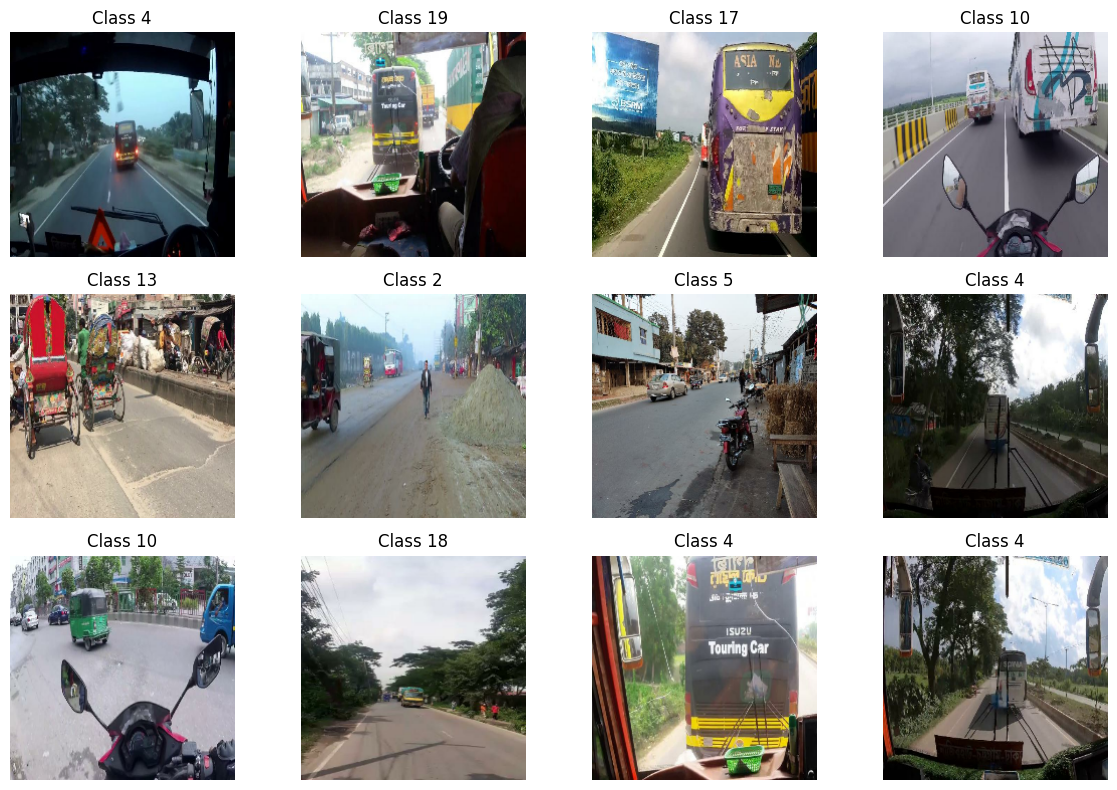

In [13]:
# --- Part 5: Visualize Sample Images ---

import matplotlib.pyplot as plt

# Pick a few samples from training dataset
def show_samples(dataset, class_names=None, n=12):
    plt.figure(figsize=(12, 8))
    i = 0
    for images, labels in dataset.take(1):  # take one batch
        for img, label in zip(images.numpy().astype("uint8"), labels.numpy()):
            if i >= n:
                break
            ax = plt.subplot(3, 4, i+1)
            plt.imshow(img)
            if class_names:
                plt.title(class_names[label])
            else:
                plt.title(f"Class {label}")
            plt.axis("off")
            i += 1
    plt.tight_layout()
    plt.show()

# If you have a list of class names (optional)
# For now, we’ll just show numeric class IDs
show_samples(train_ds, class_names=None, n=12)


In [14]:
# --- Part 6: Data Augmentation & Preprocessing ---

from tensorflow import keras
from tensorflow.keras import layers

# Data augmentation pipeline
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.05),
    layers.RandomZoom(0.05),
    layers.RandomTranslation(0.03, 0.03),
], name="data_augmentation")

# Preprocessing for EfficientNet
preprocess_input = tf.keras.applications.efficientnet.preprocess_input

print("✅ Data augmentation and preprocessing layers ready")


✅ Data augmentation and preprocessing layers ready


In [15]:
# --- Part 7: Build Transfer Learning Model ---

from tensorflow.keras.applications import EfficientNetB0

def build_model(input_shape=(224, 224, 3), num_classes=NUM_CLASSES, fine_tune_at=100, dropout_rate=0.3):
    inputs = keras.Input(shape=input_shape)

    # Augment + preprocess
    x = data_augmentation(inputs)
    x = preprocess_input(x)

    # Base model (transfer learning backbone)
    base_model = EfficientNetB0(include_top=False, input_tensor=x, weights="imagenet")
    base_model.trainable = True

    # Fine-tuning: freeze first N layers
    if fine_tune_at is not None:
        for layer in base_model.layers[:fine_tune_at]:
            layer.trainable = False

    # Classification head
    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout_rate)(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)

    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

# Build the model
model = build_model()
model.summary()

# Compile
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ data_augmentation   │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Sequential)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ data_augmentatio… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati

 Total params: 4,080,311 (15.57 MB)

 Trainable params: 3,878,608 (14.80 MB)

 Non-trainable params: 201,703 (787.91 KB)

In [22]:
from ultralytics import YOLO

# Load your trained model
model = YOLO("/content/yolo11n.pt")  # or "/content/yolov8n.pt"

# Validate using your dataset
metrics = model.val(data="/content/data.yaml")

print("Validation Results:")
print(metrics)


Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1219.9±625.8 MB/s, size: 34.0 KB)
val: Scanning /content/dataset/trafic_data/valid/labels.cache... 300 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 300/300 440.4Kit/s 0.0s
val: /content/dataset/trafic_data/valid/images/Pias--359-_PNG.rf.43bcf36efe5cf8c37552d2c45fffea60.jpg: 9 duplicate labels removed
val: /content/dataset/trafic_data/valid/images/Pias--360-_PNG.rf.8405b0e44009a9300e0a1100ccf7d5b3.jpg: 7 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 19/19 4.2it/s 4.6s
                   all        300       2568     0.0362     0.0597     0.0192     0.0131
            motorcycle         30         32    0.00377      0.688    0.00649    0.00271
              airplane        220       

In [23]:
results = model.predict(source="/content/dataset/trafic_data/valid/images", save=True, imgsz=640)



image 1/300 /content/dataset/trafic_data/valid/images/Pias--139-_jpg.rf.3480cbf4cd5e0ba990e49896b2a3d9aa.jpg: 384x640 1 person, 3 cars, 2 fire hydrants, 54.6ms
image 2/300 /content/dataset/trafic_data/valid/images/Pias--14-_jpg.rf.bc90f7011d8a8519dd9c8eeb3f4a5bce.jpg: 384x640 9 persons, 7 cars, 1 motorcycle, 8.3ms
image 3/300 /content/dataset/trafic_data/valid/images/Pias--140-_jpg.rf.1fa359c696f211a5fe03f52d0d7c004a.jpg: 384x640 7 persons, 3 cars, 2 motorcycles, 3 buss, 3 trucks, 8.2ms
image 4/300 /content/dataset/trafic_data/valid/images/Pias--141-_jpg.rf.faba2aa0d33f0cf10d64d508652c2c3d.jpg: 384x640 6 persons, 6 cars, 1 motorcycle, 7.7ms
image 5/300 /content/dataset/trafic_data/valid/images/Pias--142-_jpg.rf.1f52a77da4d54b26bd0ef1e43c839f03.jpg: 384x640 3 persons, 2 cars, 2 motorcycles, 9.6ms
image 6/300 /content/dataset/trafic_data/valid/images/Pias--143-_jpg.rf.7b258e779322ee8805d8959df71fcd29.jpg: 384x640 7 persons, 2 cars, 2 motorcycles, 1 truck, 8.2ms
image 7/300 /content/data

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import os


In [25]:
# Find latest training run
run_dir = sorted(os.listdir("runs/detect"))[-1]
csv_path = f"runs/detect/{run_dir}/results.csv"
print("Using training log:", csv_path)


Using training log: runs/detect/val2/results.csv


In [26]:
yaml_content = """
train: /content/dataset/trafic_data/train/images
val: /content/dataset/trafic_data/valid/images

nc: 20
names: ['class1','class2','class3','class4','class5','class6',
        'class7','class8','class9','class10','class11','class12',
        'class13','class14','class15','class16','class17','class18',
        'class19','class20']
"""
with open("data.yaml", "w") as f:
    f.write(yaml_content)
print("✅ data.yaml created!")


✅ data.yaml created!


In [27]:
import os

runs_dir = "/content/runs/detect"
print("Available runs:", os.listdir(runs_dir))

# For each run folder, check what files exist
for run in os.listdir(runs_dir):
    path = os.path.join(runs_dir, run)
    if os.path.isdir(path):
        print(f"\nContents of {path}:")
        print(os.listdir(path))


Available runs: ['val2', 'train', 'predict', 'val']

Contents of /content/runs/detect/val2:
['val_batch0_labels.jpg', 'val_batch2_labels.jpg', 'BoxP_curve.png', 'confusion_matrix.png', 'BoxR_curve.png', 'val_batch1_labels.jpg', 'BoxPR_curve.png', 'val_batch2_pred.jpg', 'confusion_matrix_normalized.png', 'BoxF1_curve.png', 'val_batch0_pred.jpg', 'val_batch1_pred.jpg']

Contents of /content/runs/detect/train:
['labels.jpg', 'val_batch0_labels.jpg', 'val_batch2_labels.jpg', 'train_batch0.jpg', 'BoxP_curve.png', 'confusion_matrix.png', 'train_batch1.jpg', 'args.yaml', 'BoxR_curve.png', 'val_batch1_labels.jpg', 'BoxPR_curve.png', 'val_batch2_pred.jpg', 'confusion_matrix_normalized.png', 'results.png', 'BoxF1_curve.png', 'results.csv', 'val_batch0_pred.jpg', 'train_batch2.jpg', 'weights', 'val_batch1_pred.jpg']

Contents of /content/runs/detect/predict:
['Pias--397-_jpg.rf.388e8db72077e9653424831a153a6b47.jpg', 'Pias--276-_jpg.rf.77222a73a4a431fd762487e9c3ec608c.jpg', 'Pias--330-_jpg.rf.a9ea

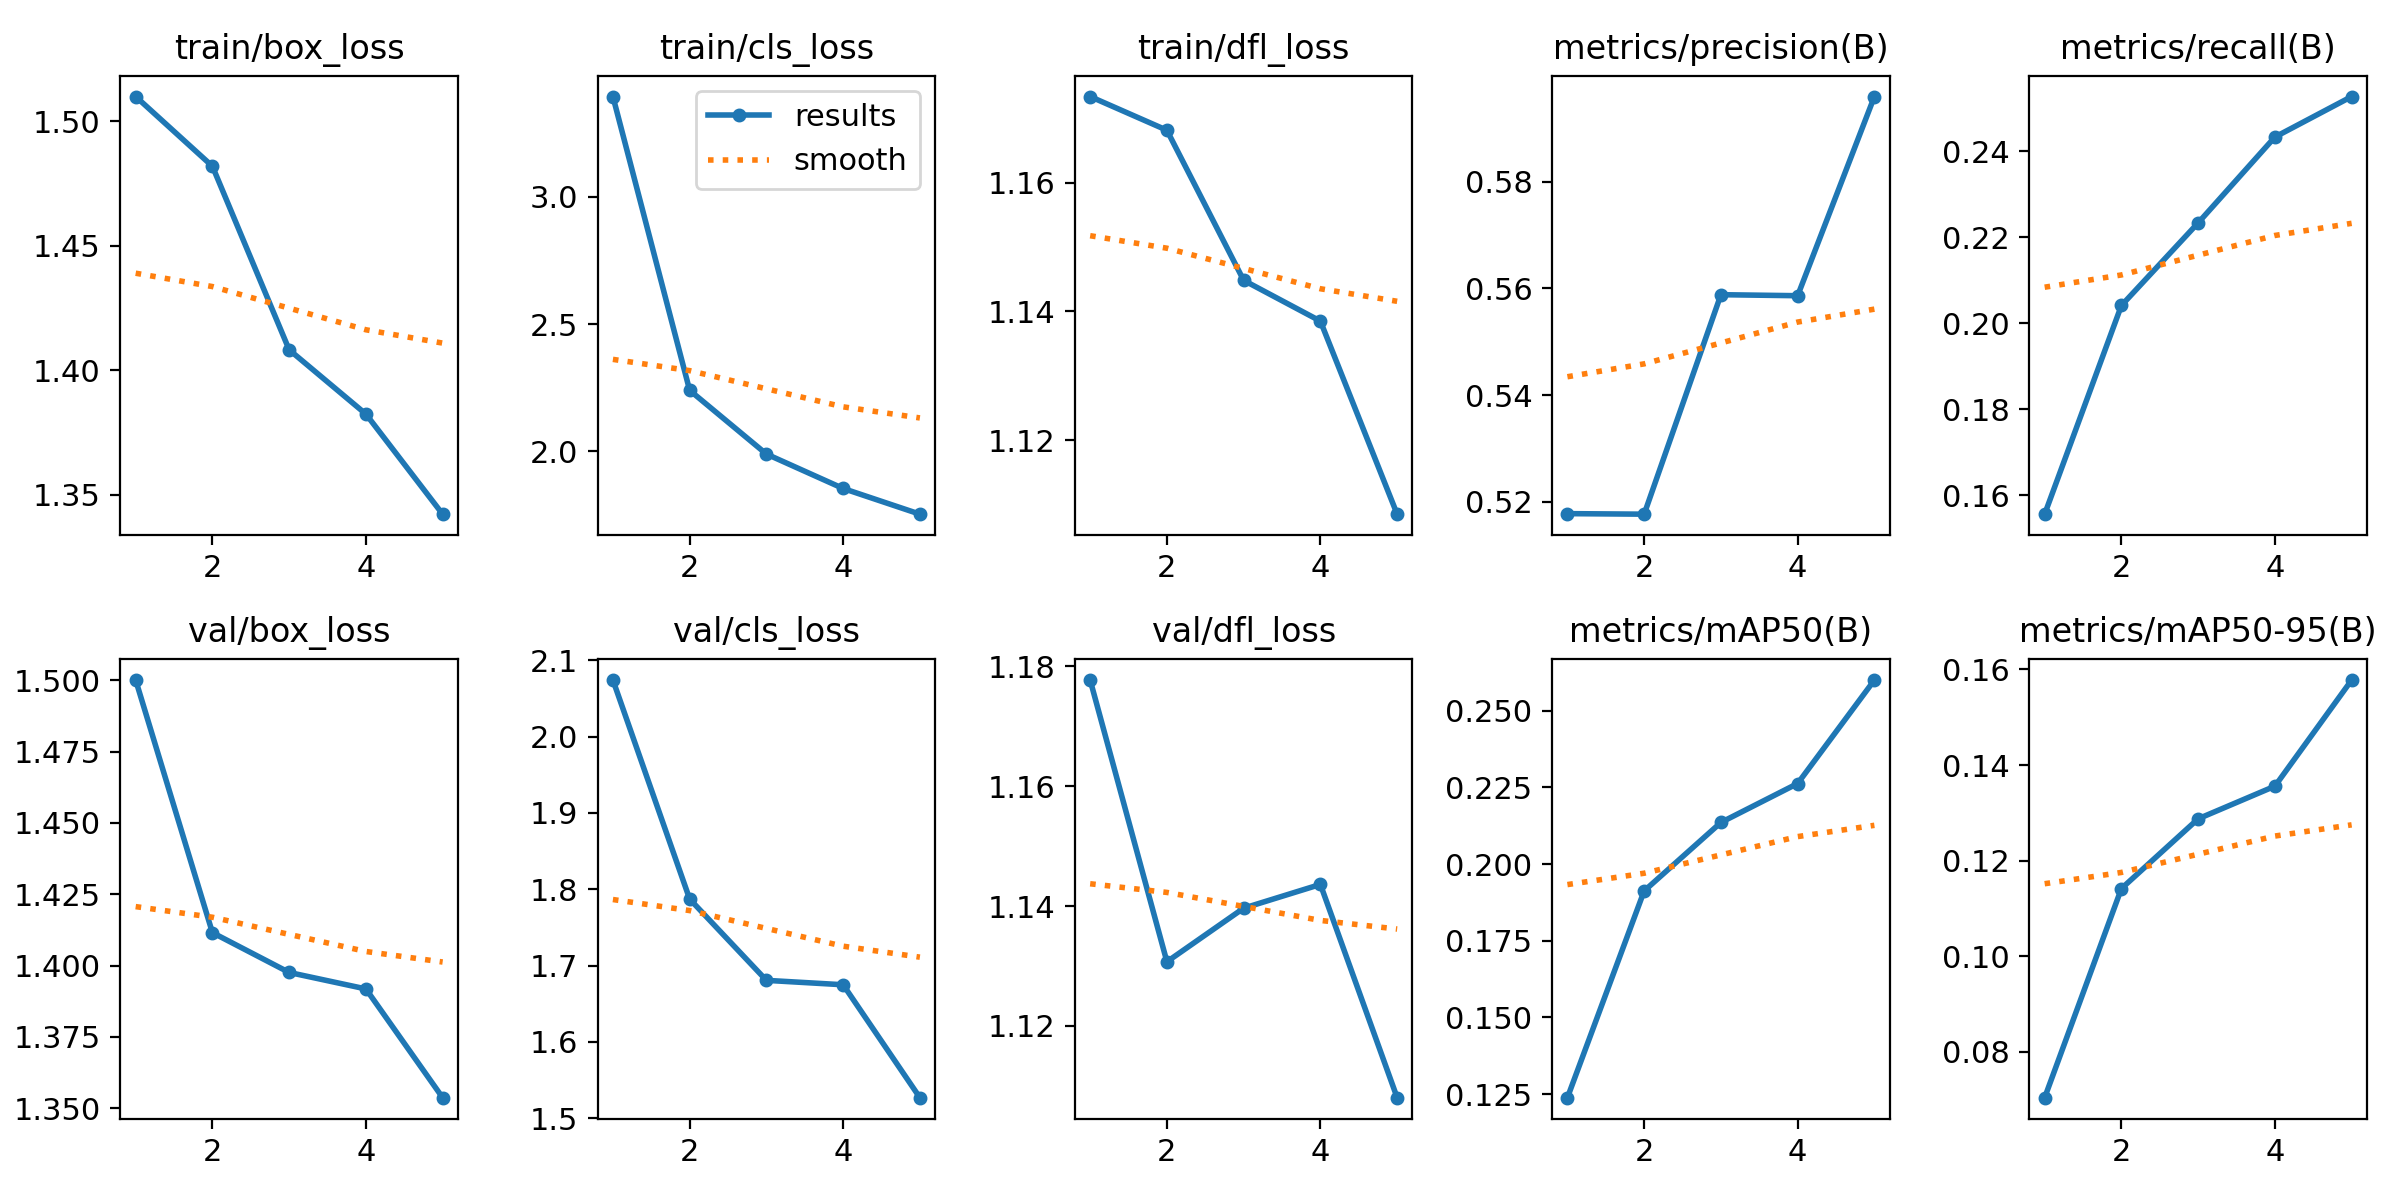

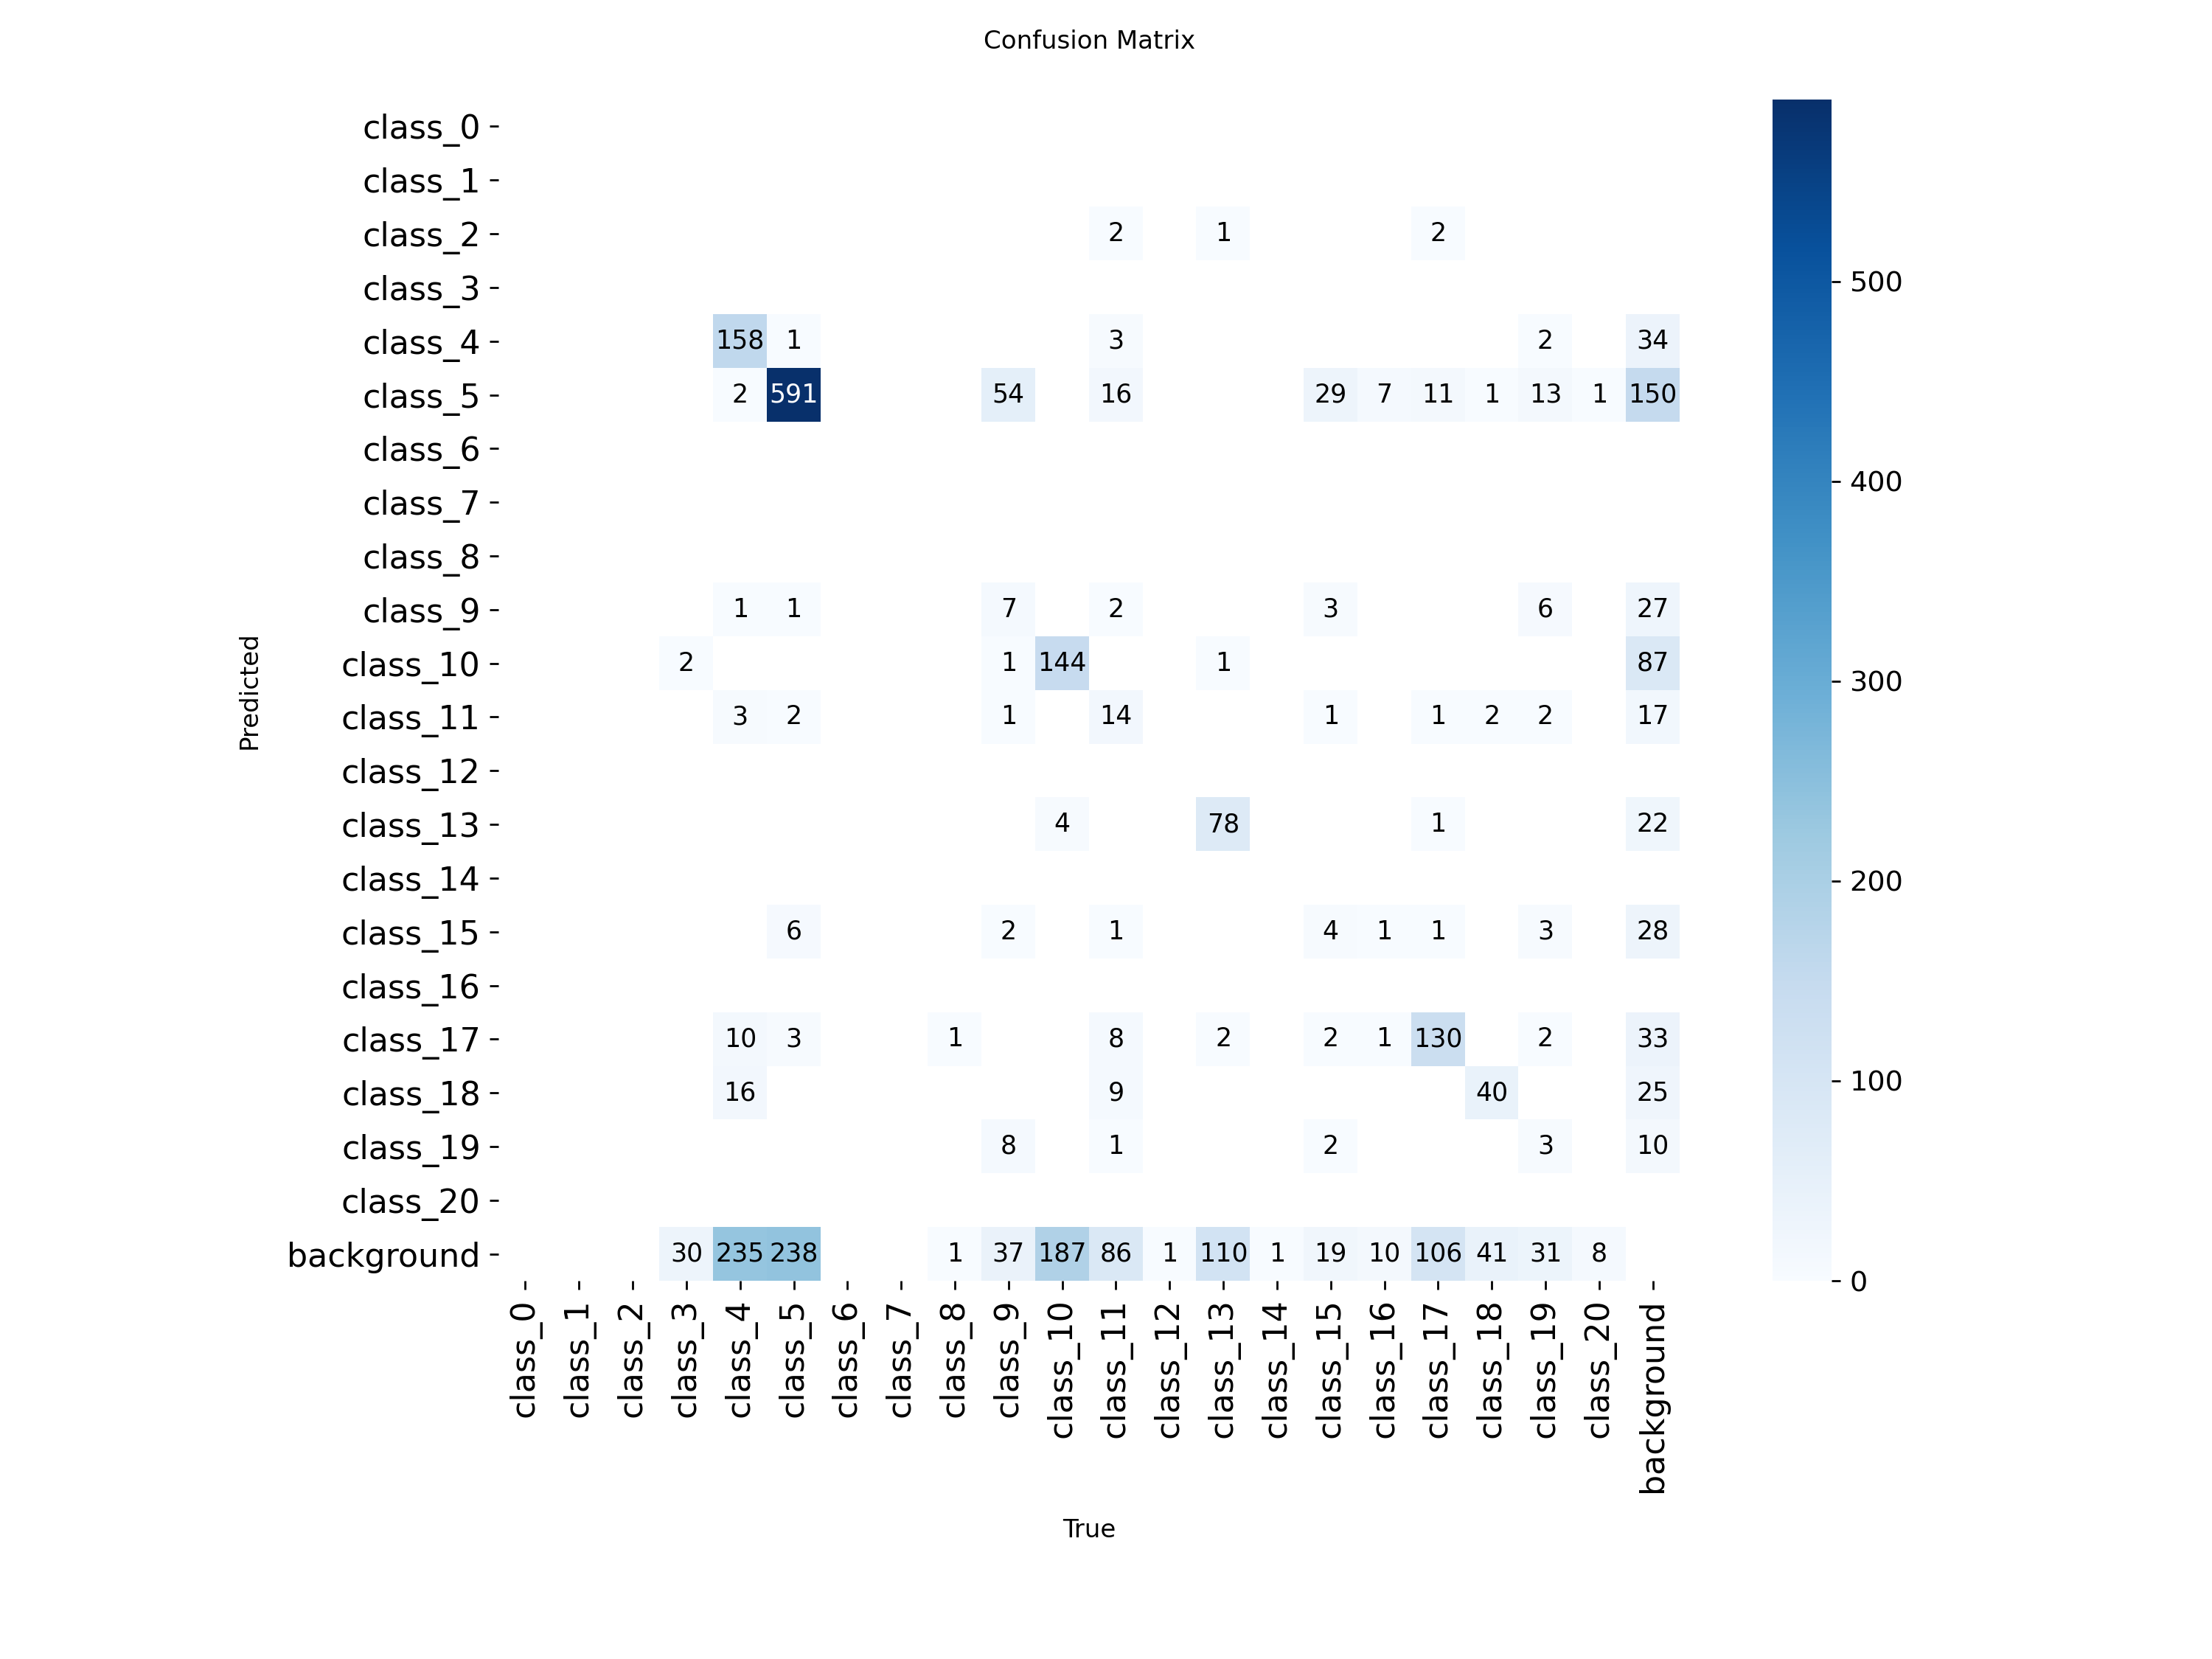

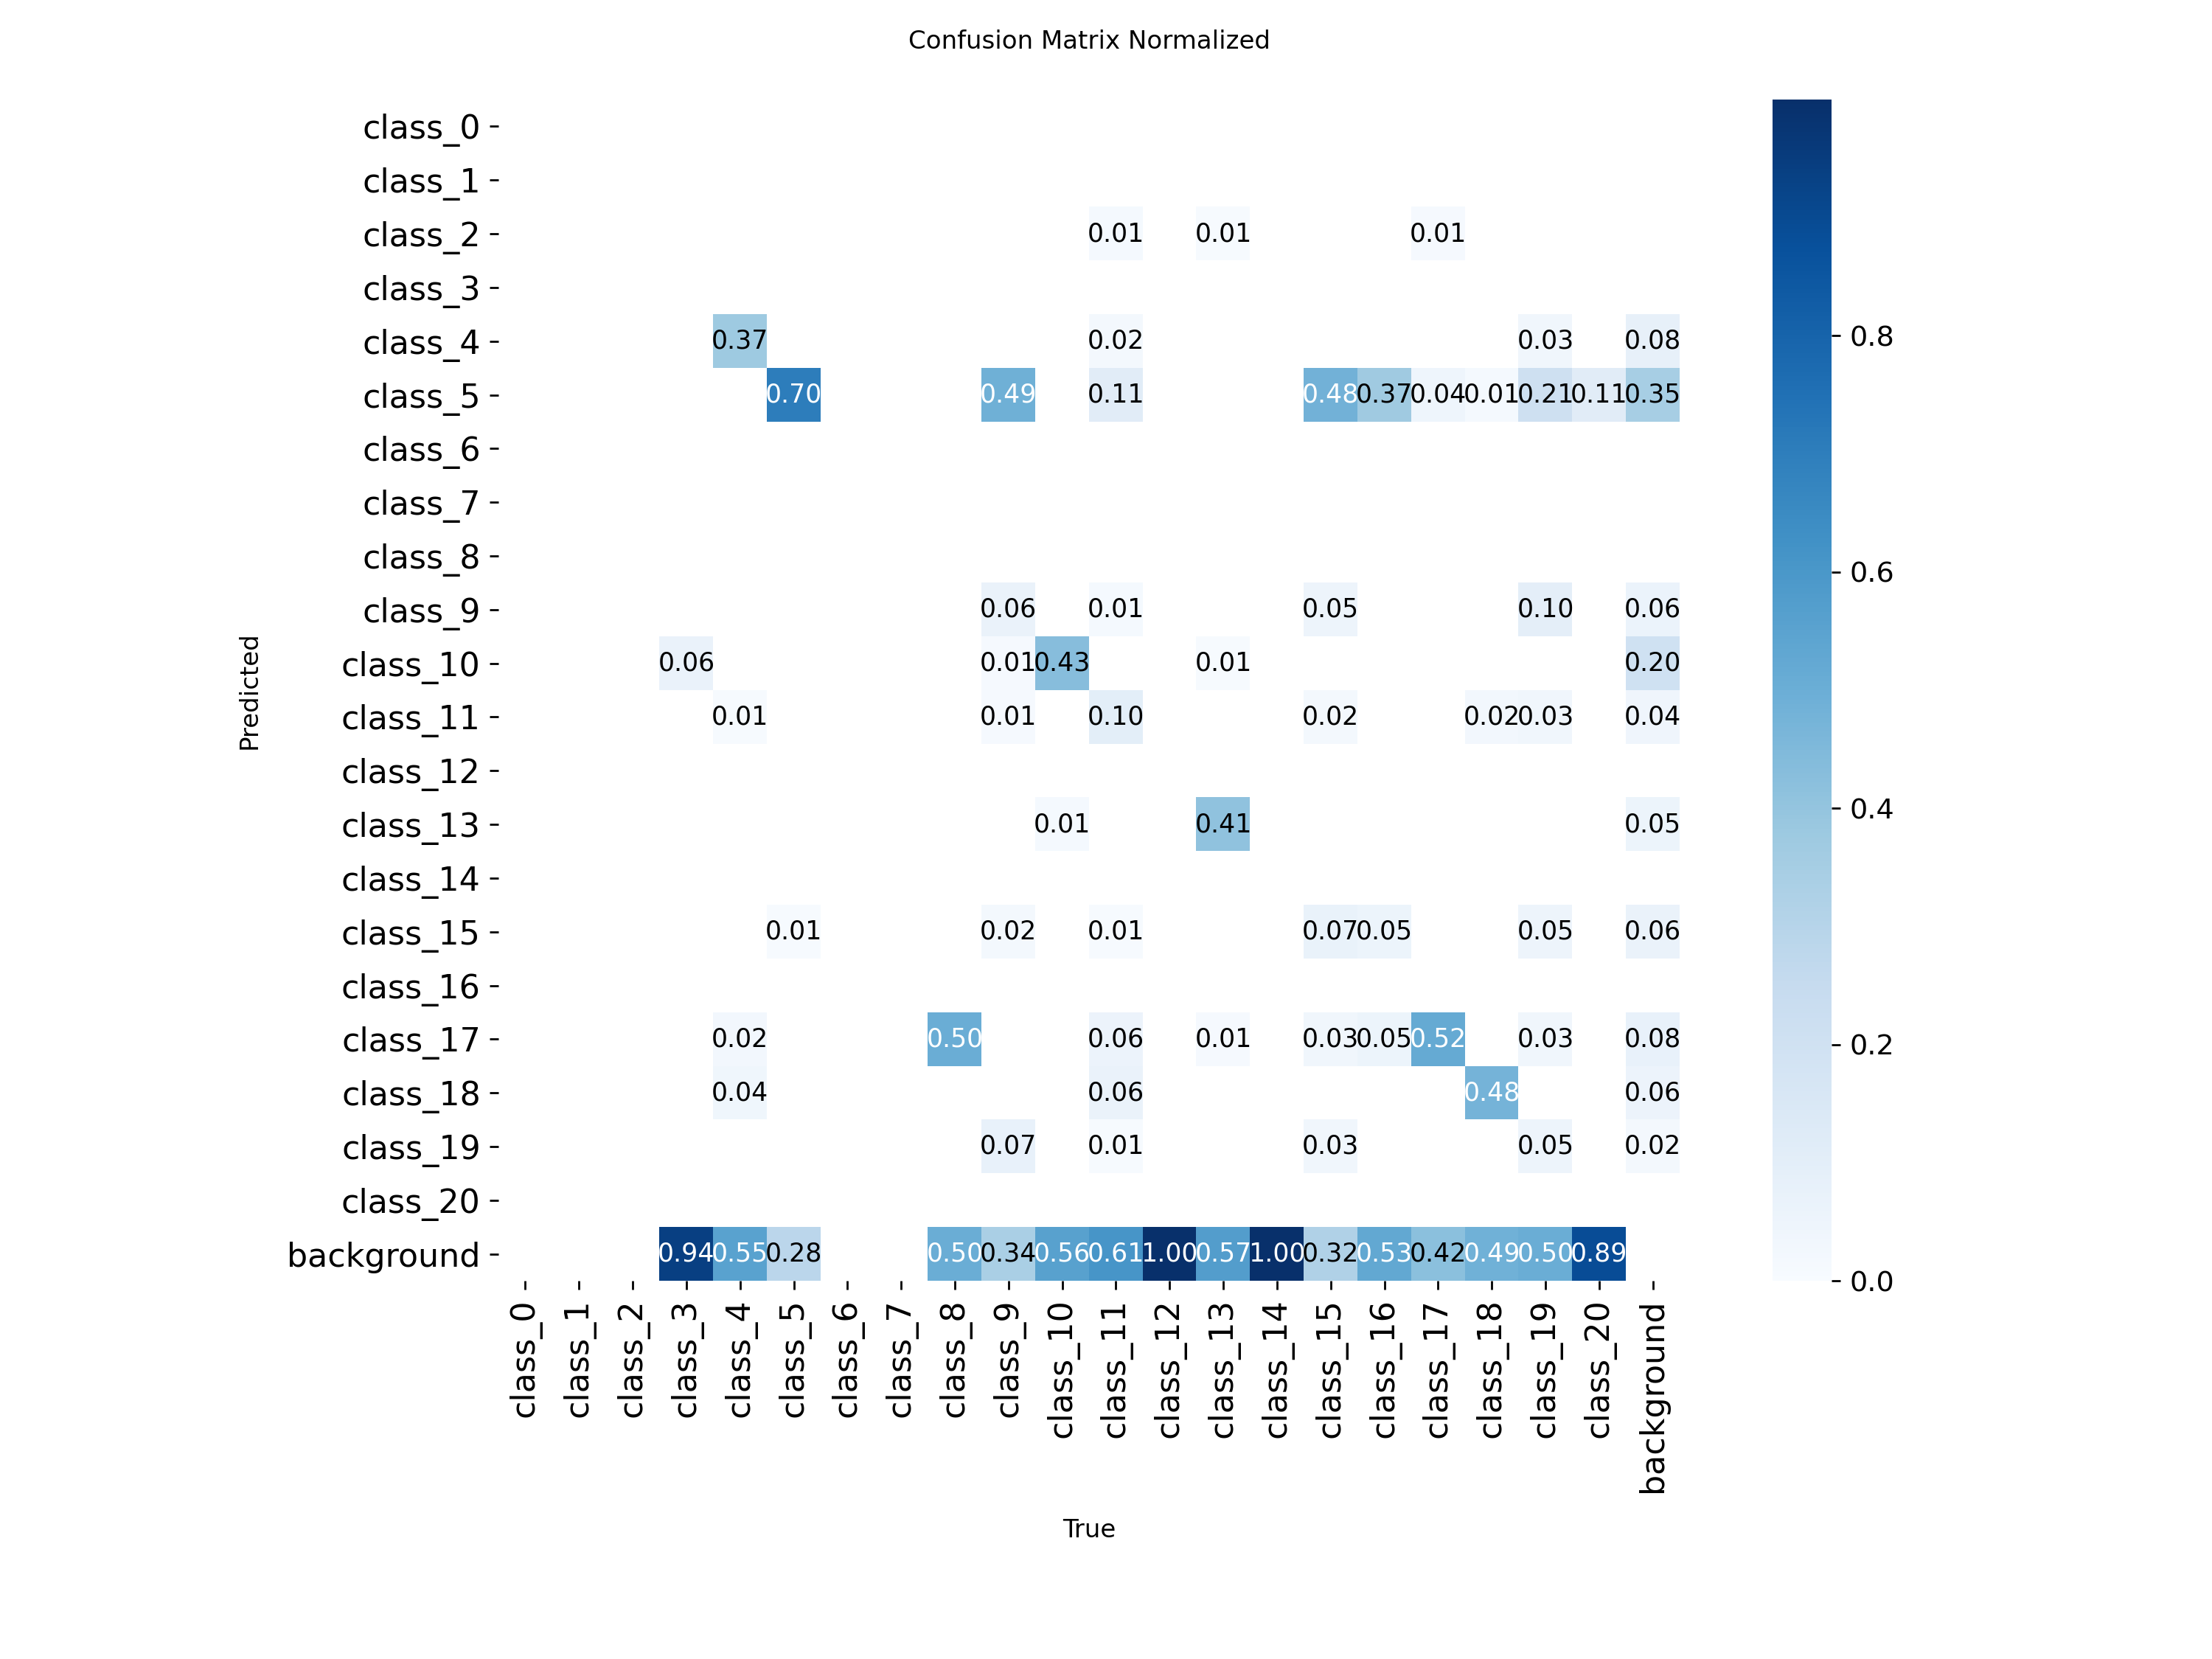

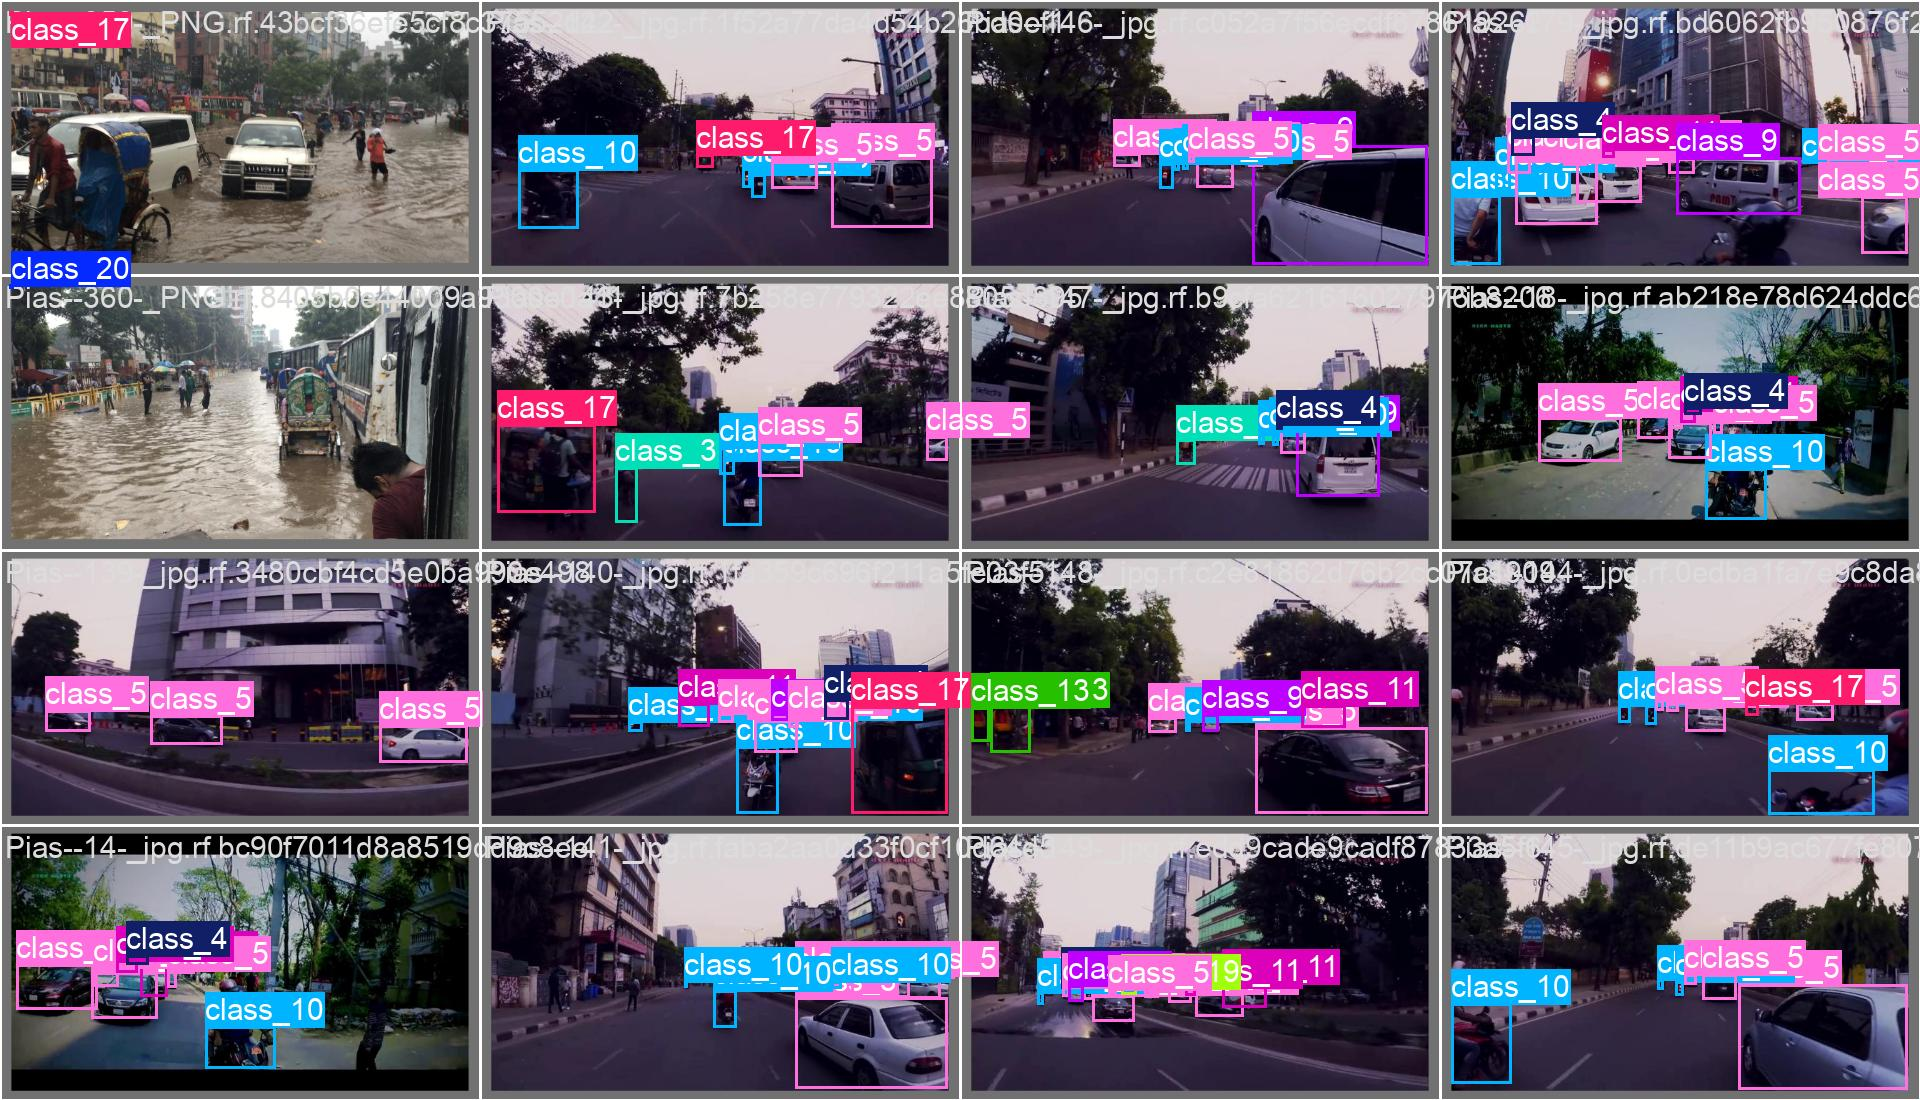

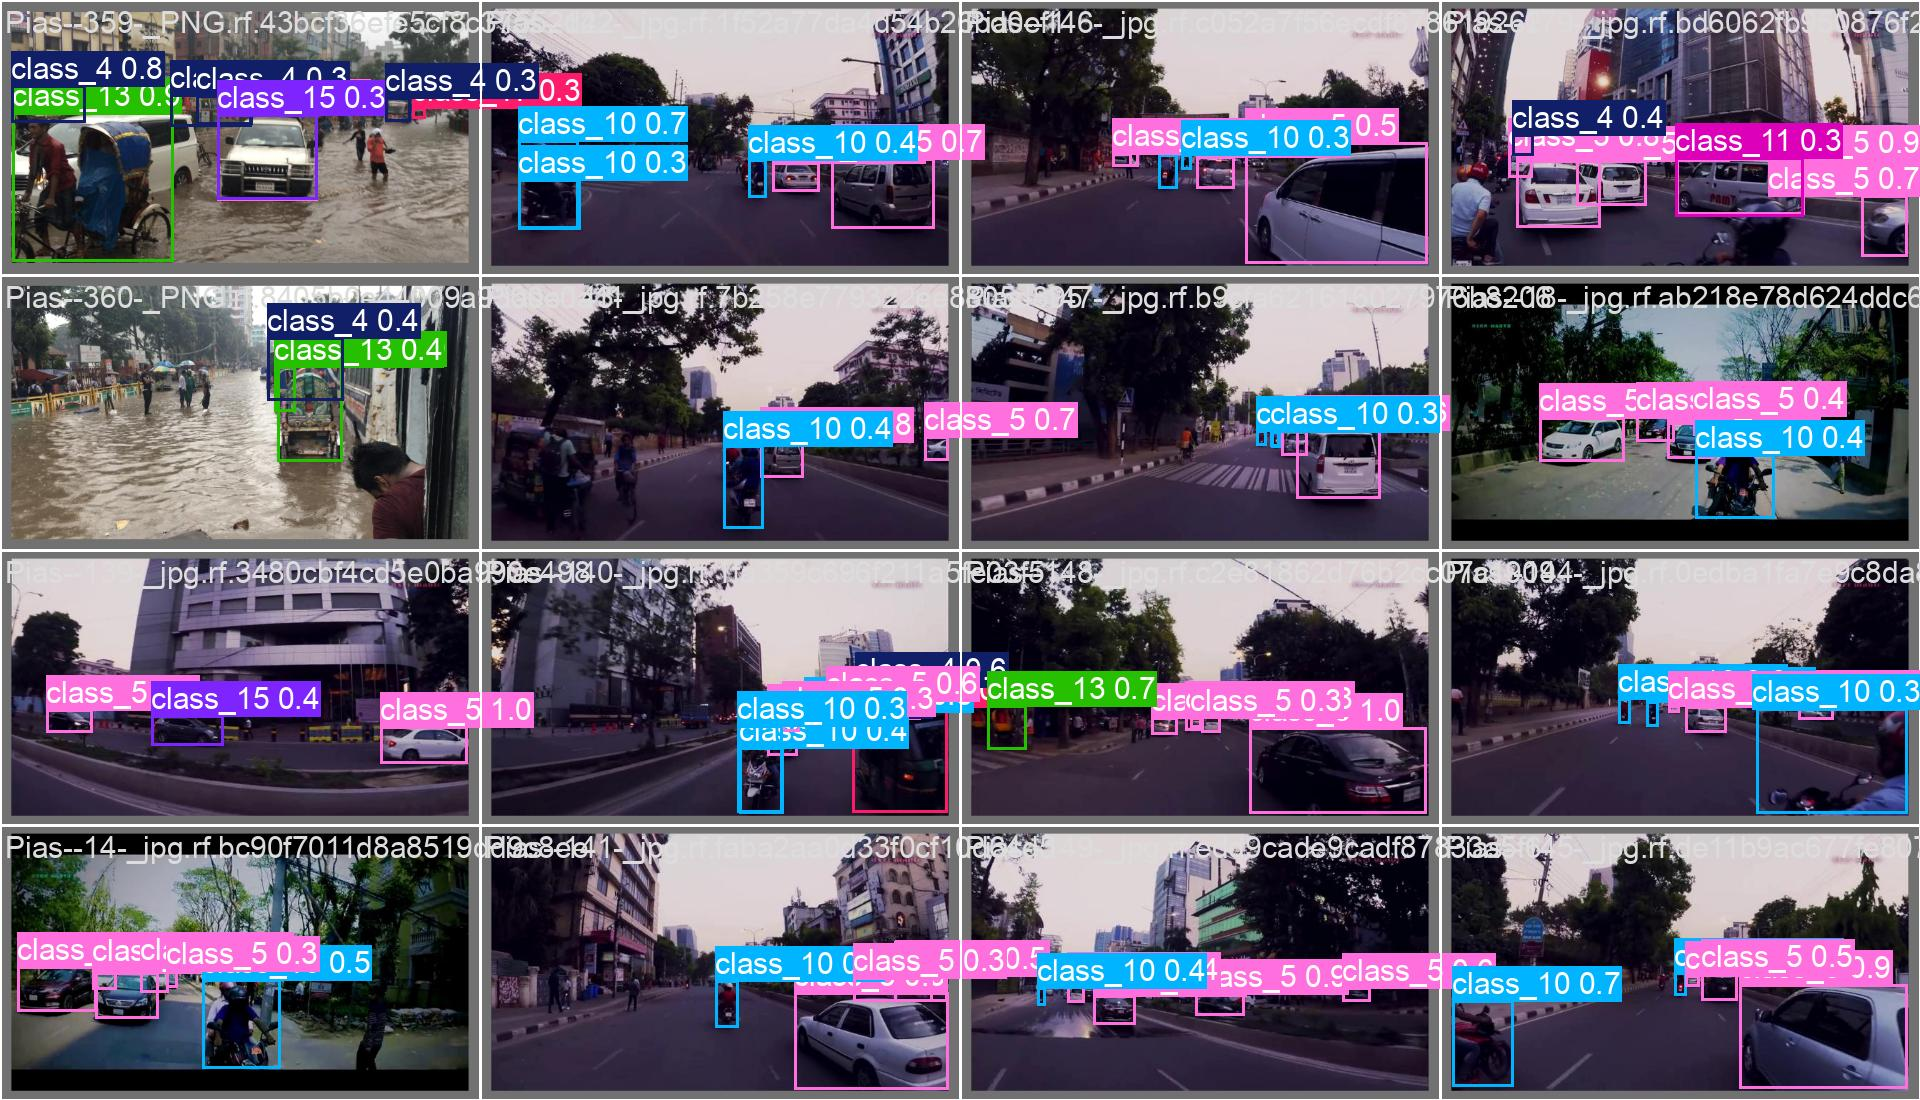

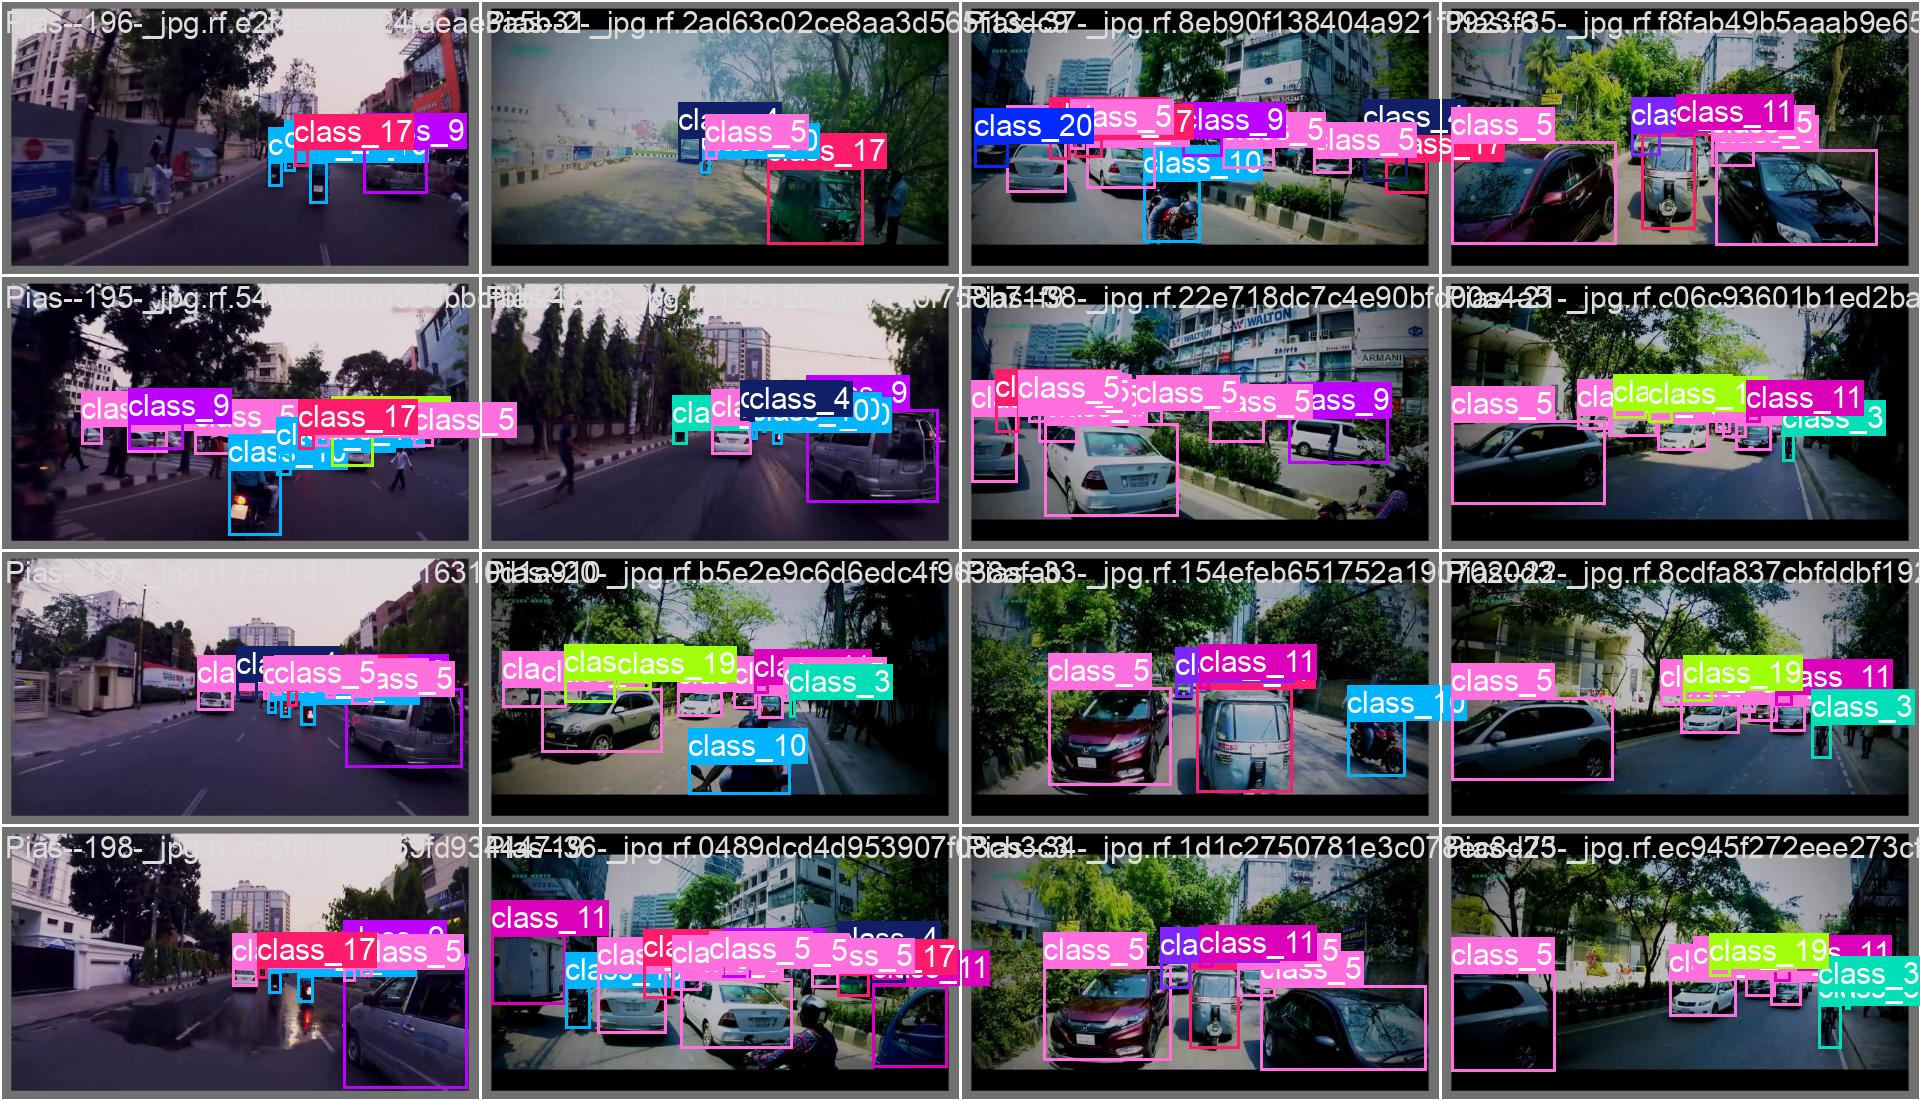

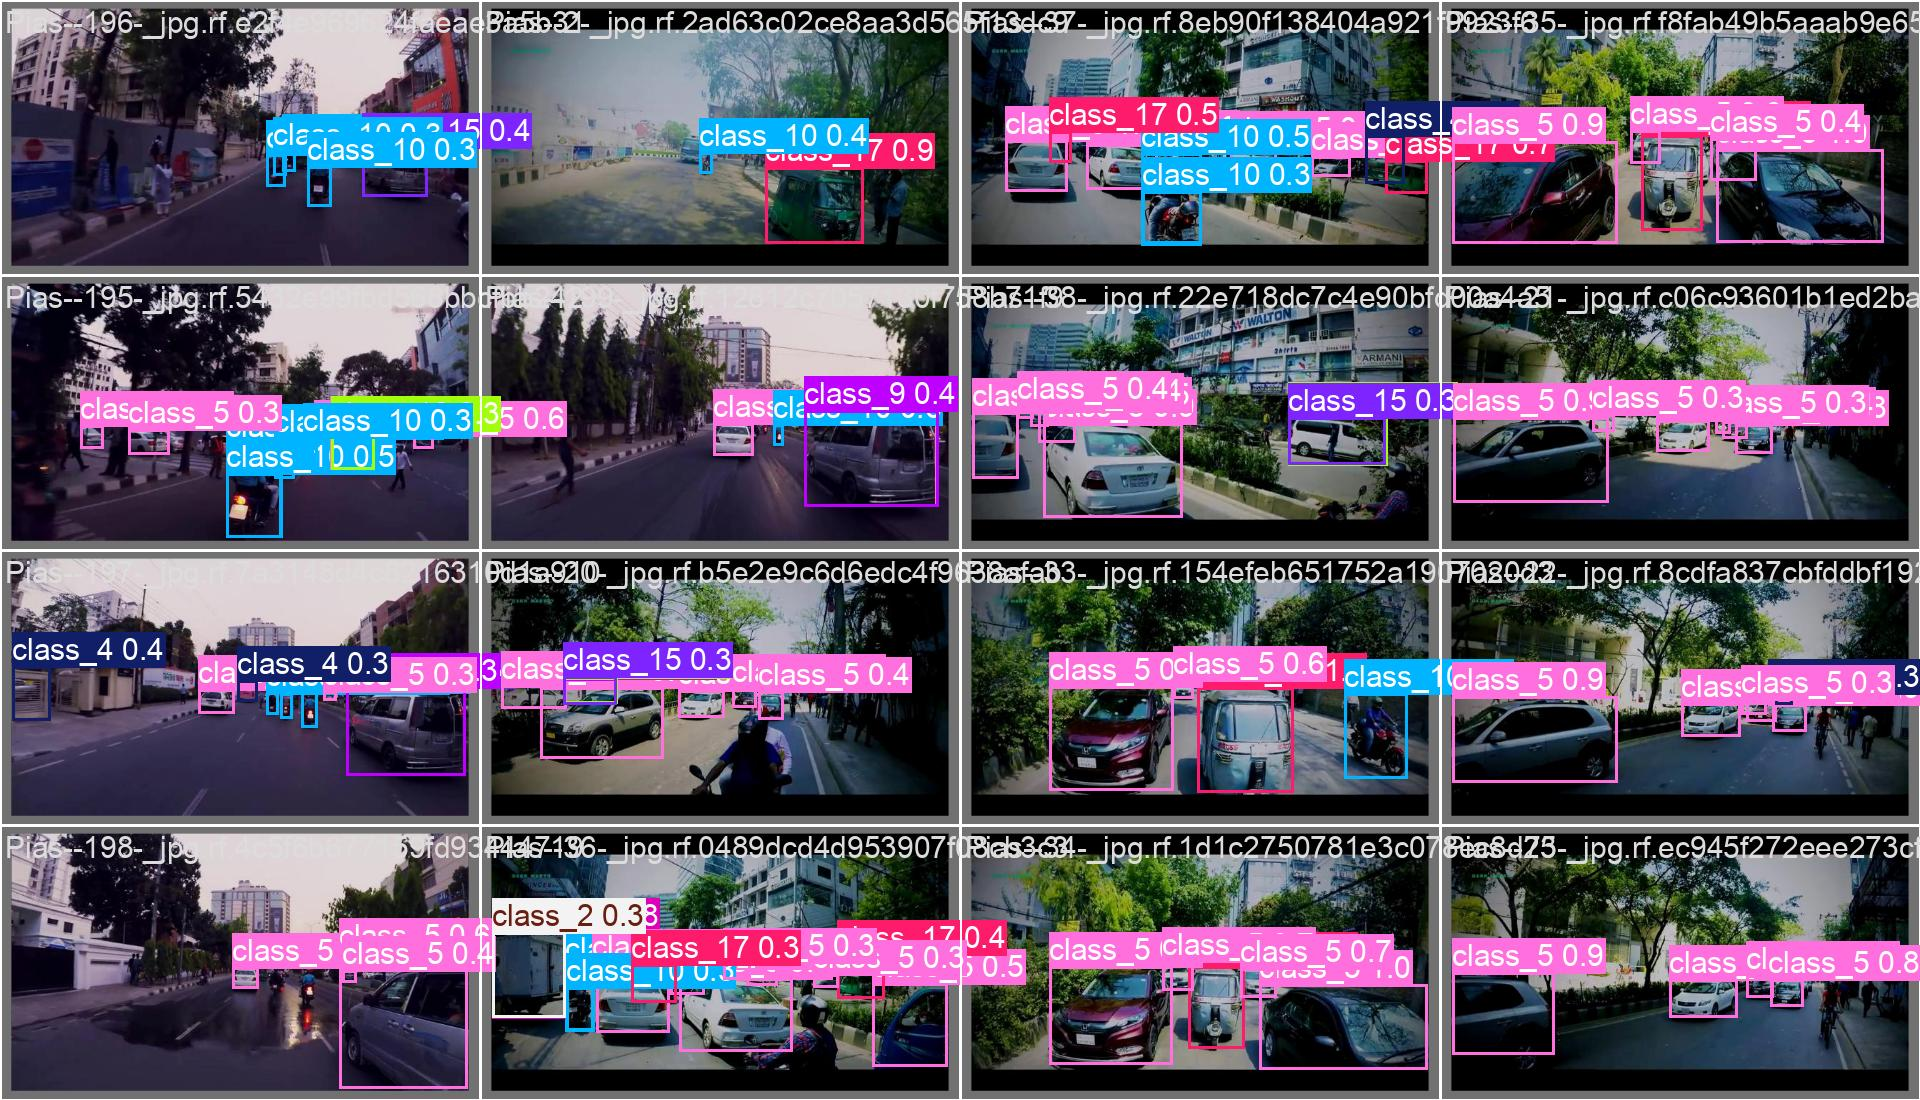

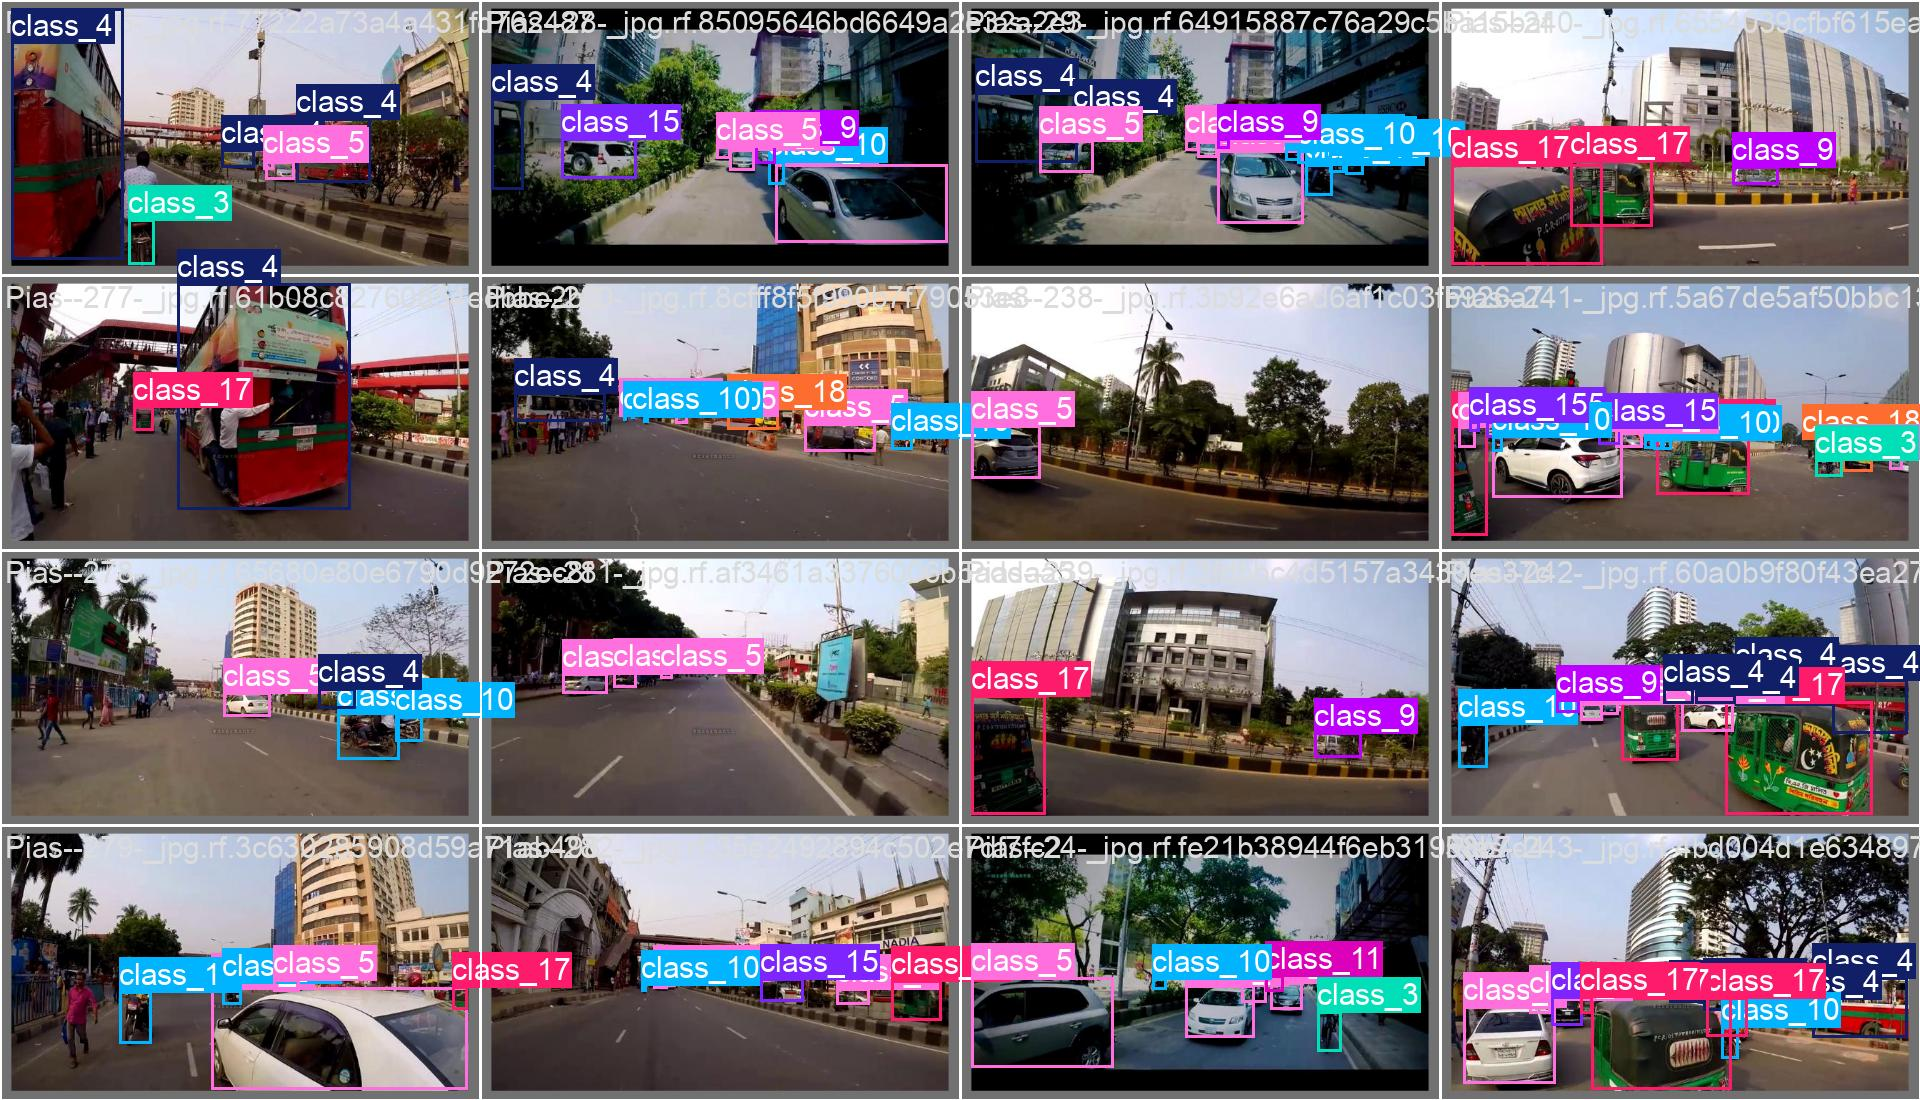

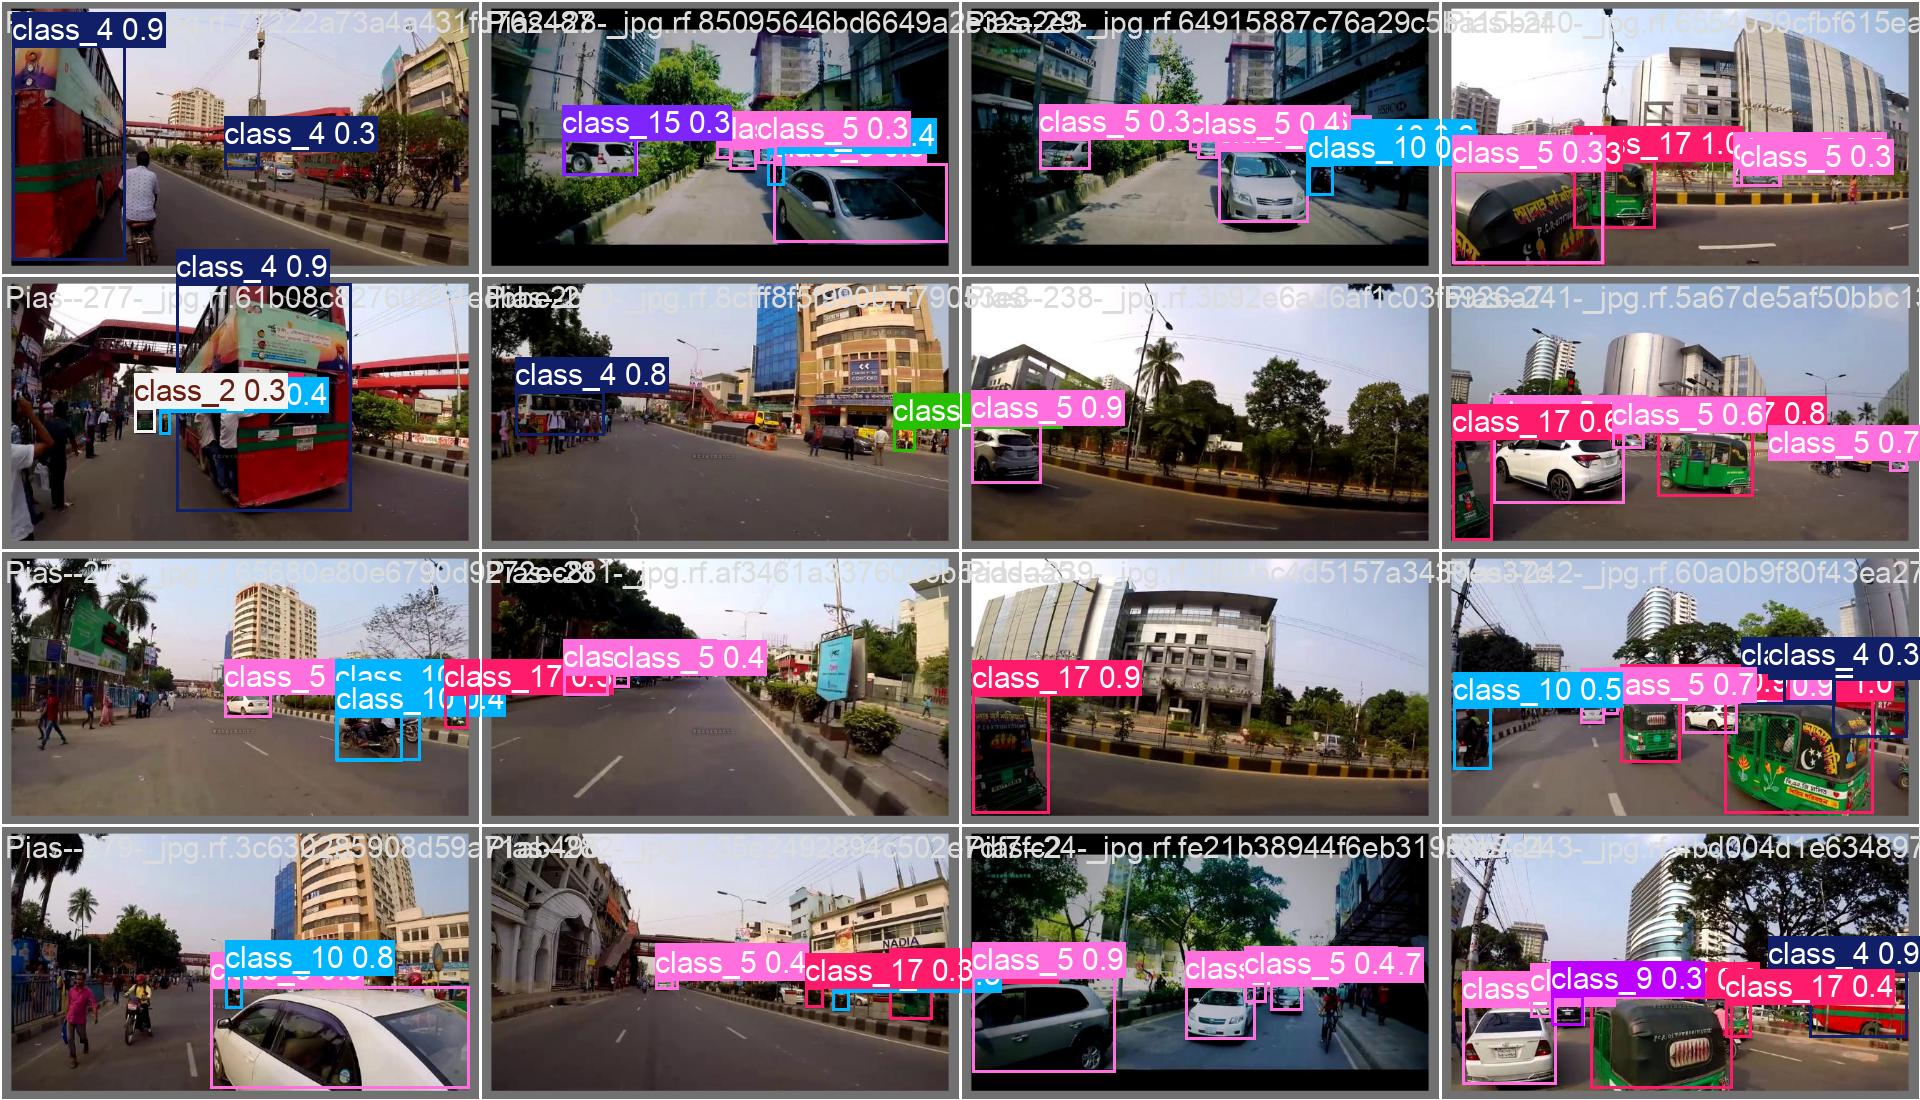

In [28]:
import matplotlib.pyplot as plt
import os
from IPython.display import Image, display

# Pick which run you want to visualize (change 'train' to 'train2' or 'train3' as needed)
run_path = "/content/runs/detect/train"

# List of key visual result files
visual_files = [
    "results.png",                   # Training/validation curves
    "confusion_matrix.png",           # Raw confusion matrix
    "confusion_matrix_normalized.png",# Normalized confusion matrix
    "val_batch0_labels.jpg",          # Ground truth labels (validation set)
    "val_batch0_pred.jpg",            # Predictions on validation set
    "val_batch1_labels.jpg",
    "val_batch1_pred.jpg",
    "val_batch2_labels.jpg",
    "val_batch2_pred.jpg"
]

# Display each visual
for vf in visual_files:
    fpath = os.path.join(run_path, vf)
    if os.path.exists(fpath):
        display(Image(filename=fpath))
    else:
        print(f"Not found: {vf}")


In [30]:
import pandas as pd
import glob

# Find latest YOLO results.csv
csv_path = sorted(glob.glob("/content/runs/detect/train*/results.csv"))[-1]
print("Using log file:", csv_path)

# Load CSV
df = pd.read_csv(csv_path)

# Show first rows + column names
print("Columns available:\n", df.columns.tolist())
print("\nHead of CSV:\n", df.head())


Using log file: /content/runs/detect/train/results.csv
Columns available:
 ['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']

Head of CSV:
    epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1   53.0987         1.50988         3.39455         1.17335   
1      2  101.6690         1.48191         2.24022         1.16812   
2      3  149.6250         1.40826         1.98985         1.14483   
3      4  198.4650         1.38247         1.85452         1.13850   
4      5  245.4610         1.34230         1.75360         1.10854   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.51777            0.15561           0.12385   
1               0.51767            0.20414           0.19127   
2               0.55883            0.22336           0.2135

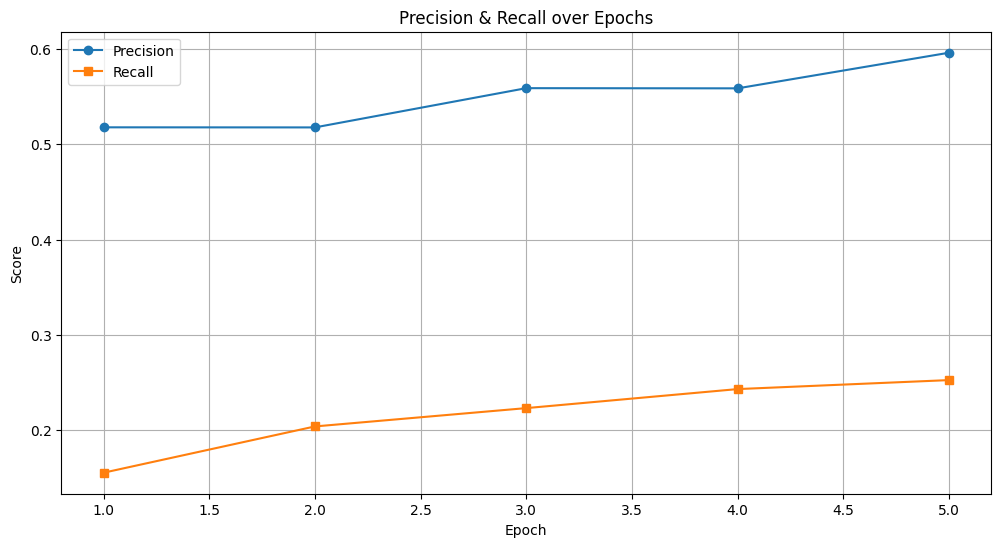

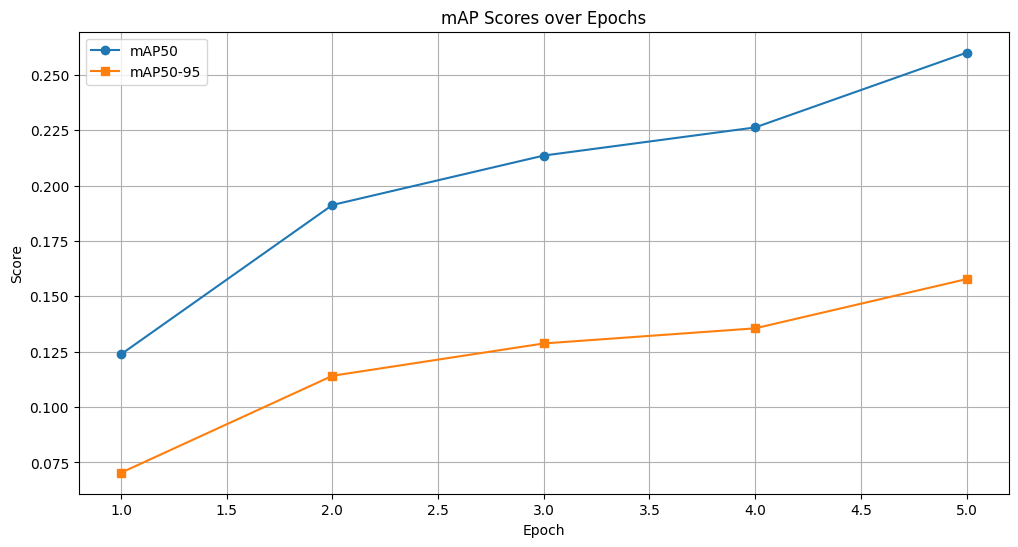

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

# Load latest results.csv
csv_path = sorted(glob.glob("/content/runs/detect/train*/results.csv"))[-1]
df = pd.read_csv(csv_path)

# Plot Precision & Recall
plt.figure(figsize=(12,6))
plt.plot(df["epoch"], df["metrics/precision(B)"], label="Precision", marker="o")
plt.plot(df["epoch"], df["metrics/recall(B)"], label="Recall", marker="s")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.title("Precision & Recall over Epochs")
plt.legend()
plt.grid(True)
plt.show()

# Plot mAP50 and mAP50-95
plt.figure(figsize=(12,6))
plt.plot(df["epoch"], df["metrics/mAP50(B)"], label="mAP50", marker="o")
plt.plot(df["epoch"], df["metrics/mAP50-95(B)"], label="mAP50-95", marker="s")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.title("mAP Scores over Epochs")
plt.legend()
plt.grid(True)
plt.show()



📌 Final Model Performance (Epoch 5)
Precision: 0.5960
Recall: 0.2527
mAP50: 0.2600
mAP50-95: 0.1578
Validation Box Loss: 1.3537
Validation Cls Loss: 1.5269
Validation DFL Loss: 1.1080


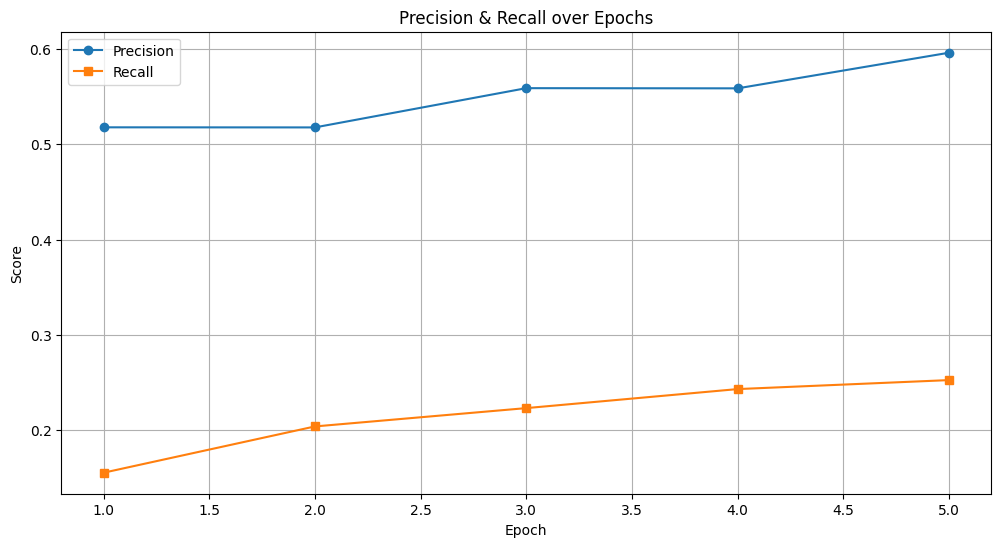

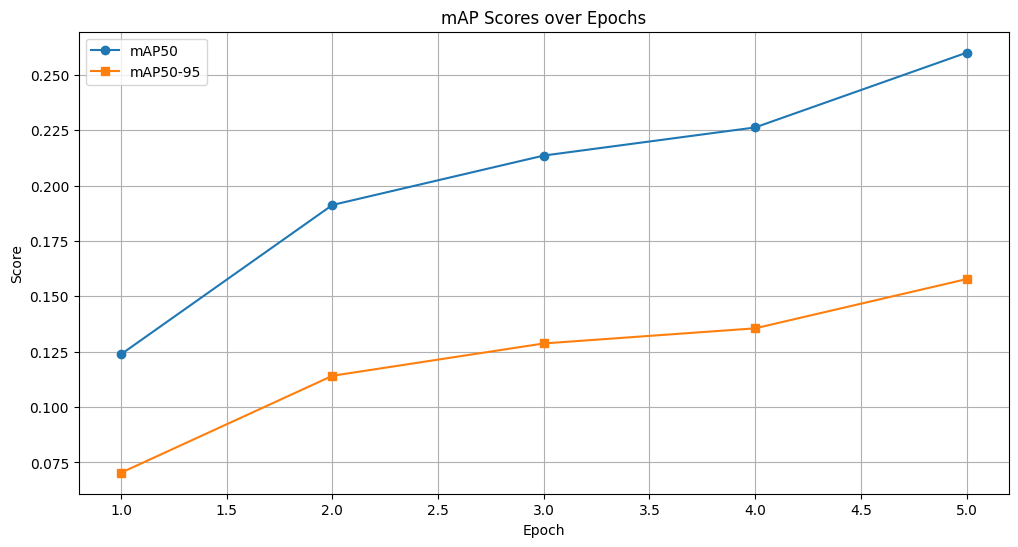

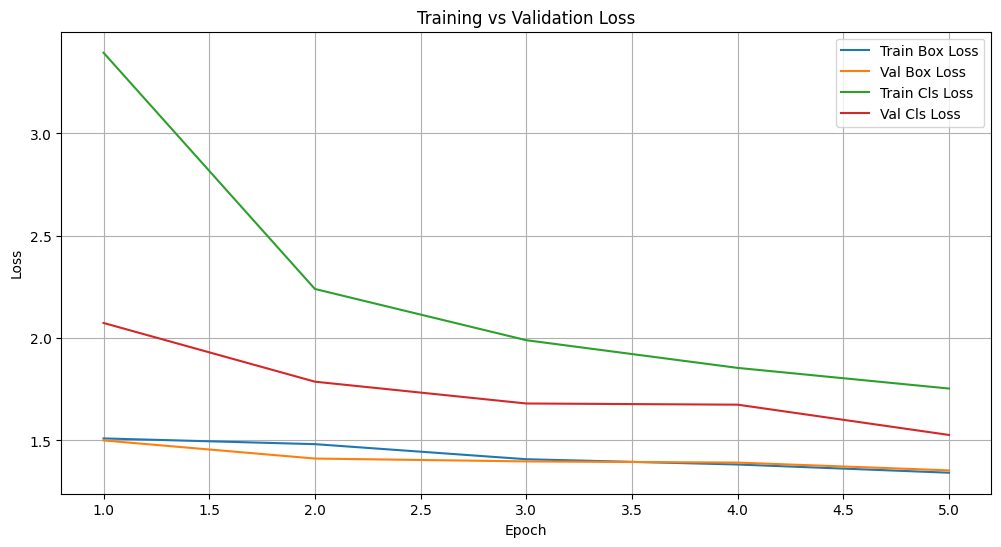

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

# Load latest training log
csv_path = sorted(glob.glob("/content/runs/detect/train*/results.csv"))[-1]
df = pd.read_csv(csv_path)

# -------------------------
# 1. Extract Final Metrics
# -------------------------
final_metrics = df.iloc[-1]  # last epoch
print("\n📌 Final Model Performance (Epoch {})".format(int(final_metrics["epoch"])))
print("Precision: {:.4f}".format(final_metrics["metrics/precision(B)"]))
print("Recall: {:.4f}".format(final_metrics["metrics/recall(B)"]))
print("mAP50: {:.4f}".format(final_metrics["metrics/mAP50(B)"]))
print("mAP50-95: {:.4f}".format(final_metrics["metrics/mAP50-95(B)"]))
print("Validation Box Loss: {:.4f}".format(final_metrics["val/box_loss"]))
print("Validation Cls Loss: {:.4f}".format(final_metrics["val/cls_loss"]))
print("Validation DFL Loss: {:.4f}".format(final_metrics["val/dfl_loss"]))

# -------------------------
# 2. Plot Precision & Recall
# -------------------------
plt.figure(figsize=(12,6))
plt.plot(df["epoch"], df["metrics/precision(B)"], label="Precision", marker="o")
plt.plot(df["epoch"], df["metrics/recall(B)"], label="Recall", marker="s")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.title("Precision & Recall over Epochs")
plt.legend()
plt.grid(True)
plt.show()

# -------------------------
# 3. Plot mAP Scores
# -------------------------
plt.figure(figsize=(12,6))
plt.plot(df["epoch"], df["metrics/mAP50(B)"], label="mAP50", marker="o")
plt.plot(df["epoch"], df["metrics/mAP50-95(B)"], label="mAP50-95", marker="s")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.title("mAP Scores over Epochs")
plt.legend()
plt.grid(True)
plt.show()

# -------------------------
# 4. Plot Training & Validation Loss
# -------------------------
plt.figure(figsize=(12,6))
plt.plot(df["epoch"], df["train/box_loss"], label="Train Box Loss")
plt.plot(df["epoch"], df["val/box_loss"], label="Val Box Loss")
plt.plot(df["epoch"], df["train/cls_loss"], label="Train Cls Loss")
plt.plot(df["epoch"], df["val/cls_loss"], label="Val Cls Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()
